<a href="https://colab.research.google.com/github/Jordan-Hastings/Choro-Pilot/blob/main/Choro_Pilot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Choropleth Webmapping Pilot

## Obtaining Data via the Census API

Use of the US Census Bureau's API \[Application Programming Interface\] for its very rich suite of data is described at the [Developers Website](https://www.census.gov/data/developers/data-sets.html)

The API is implemented in a collection of URLs, which can be used from custom software or directly from a Web browser. As a simple example, the URL below returns the 2020 populations, coded as DP1_0001C, for the 50 states, per the decennial census that year. Just click it! to see the result. <br>
https://api.census.gov/data/2020/dec/dp?get=NAME,DP1_0001C&for=state:*


Many other data items are available on decennial census years: the full list for 2020 is available [HERE](https://api.census.gov/data/2020/dec/dp/variables.html).

Between decennial censuses, the American Community Survey (ACS) provides *estimates* of many demographic, economic, and sociologic data-items. An extensive list of example API calls is provided for each survey year and temporal extent, i.e. 1-yr or 5-yr. For example, APIs for the most recent ACS data, 2024 1-yr data are tabulated [HERE](https://api.census.gov/data/2024/acs/acs1/examples.html)

The even more extensive -- actually overwhelming -- list of data-items that can be queries with the ACS API calls is tabulated [HERE](https://api.census.gov/data/2024/acs/acs1/variables.html). Be patient! This page make take half-a-minute to fully load.  

A short list of some of the most important variables appears below:<br> B01001_001E =POP Population (# persons)<br> B19013_001E =MHI Median Household Income (current \$)<br> B25003_001E =THU Housing Units (# dwellings)<br> B25077_001E =MHV Median Housing Value (current \$)<br> B25105_001E =MHC Median Housing Cost (current \$)<p>A fuller (still greatly abbreviated) list is given [HERE](https://drive.google.com/file/d/1mm5mNVVkSTuzZjpW_8sWUmkCNQYQF-wA/view?usp=drive_link) (<small>courtesy of Warren Glimpse (Proximimity One)</small>)

As a complete example, the following Web URL returns 2024 estimates of POP and MHI for the three counties of Delaware <br>
https://api.census.gov/data/2024/acs/acs1?get=NAME,B01001_001E,B19013_001E&for=county:*&in=state:10 <p> (The FIPS code for Delaware is 10)

The Python code in the following cell automates the entire process of fetching ACS data via API into a .csv file on your own machine (rather than in a browser tab). Just click the black triangle at the cell's left margin and watch the code's progress below as it runs. When the code completes,in just a few seconds, the sample POP and MHI data for the three counties of Delaware will be found in the 'response.csv' file in your Downloads folder.<p>NB: Simply edit the URL in this cell to obtain the same or different data-items for other states.

In [ ]:
import requests

from google.colab import drive
drive.mount('/content/drive')

# Fetch Census data by API
url = 'https://api.census.gov/data/2023/acs/acs5?get=NAME,B01001_001E,B19013_001E&for=county:*&in=state:06'
custom_headers = {
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/142.0.0.0 Safari/537.36'
}
response = requests.get(url, headers=custom_headers)
# print(response.status_code)

# trivially convert JSON [[],[],...] to .csv by removing [ and ]
file_name = '/content/drive/MyDrive/test_folder/response.csv'
with open(file_name, "w", encoding="utf-8") as f:
    f.write(response.text.replace("[","").replace("]",""))
print("Wrote '"+file_name[15:99]+"'")

#webbrowser.open(file_name)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Wrote 'MyDrive/test_folder/response.csv'


## Webmapping Data from the Census

Using the Census API mechanism above, ACS 2023 5-year POP and MHI data for the countys of California and Nevada was downloaded then recollected in a Googlesheet, viewable [HERE](https://docs.google.com/spreadsheets/d/12Jc3NpXr5fXHJr5rejGxM-L6CbZfuuG6Gjjv5B77lVs/edit?usp=sharing).

The static image below displays choropleths of county population density, i.e. POP / [sqmi] of county land area, made directly from the Google sheet (using Excel). <p>
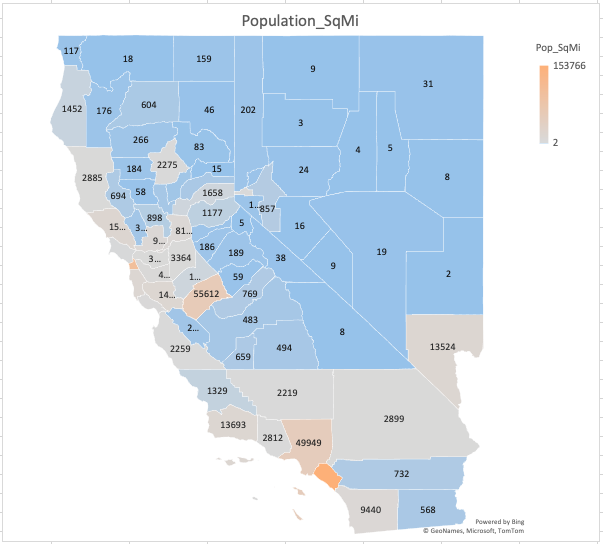

The Python code in the following cell displays choropleths of county Population density \[sqmi], in an interactive Google Webmap.

In [1]:
# @title
from IPython.display import IFrame
url = 'https://jordan-hastings.github.io/Choro-Pilot/index.html?POP'
IFrame(src=url,width='850px', height='800px')

Similarly, the static image below displays choropleths of county median household income, MHI, <br>made directly from the Google sheet (in Excel).<p>
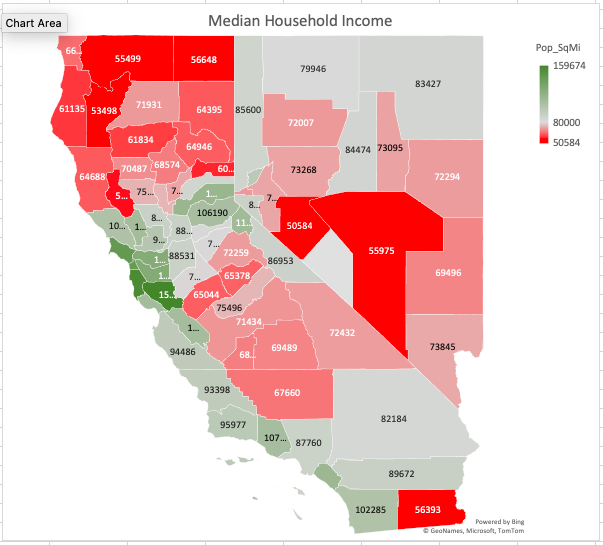

And the Python code in the following cell displays choropleths of county MHI in a second Google Webmap. (A full GIS might plot these data together, using more elegant cartography.)

In [2]:
# @title
from IPython.display import IFrame
url = 'https://jordan-hastings.github.io/Choro-Pilot/index.html?MHI'
IFrame(src=url,width='850px', height='800px')

[end]